# EMRISur1dq1e4

Notebook Author: Tousif Islam (tislam - at - umassd.edu)

The waveform model, EMRISur1dq1e4, is described in https://arxiv.org/abs/1910.10473 (Nur E. M. 2019 et. al.). 

EMRISur1dq1e4 is a surrogate gravitational-waveform model for non-spinning black hole binary systems with mass-ratios varying from 3 to $10^4$. This surrogate model is trained on waveform data generated by point-particle black hole perturbation theory (ppBHPT), with the total mass rescaling paramter tuned to NR simulations according to the paper's Eq. 4. Available modes are  $\{(2,2), (2,1), (3,3), (3,2), (3,1), (4,4), (4,3), (4,2), (5,5), (5,4), (5,3)\}$. The $m<0$ modes can be deduced from the m>0 modes due to symmetry of the system about the orbital plane. 

NOTE : This notebook rquires the file emri_sur_load.py and EMRISur1dq1e4.h5 datafile in the same directory for waveform generation

### Download h5 data containing fits

Surrogate models are numerical models. They require code *and* data

The EMRI surrogate model's data is [hosted on zenodo](https://zenodo.org/record/3612600#.XsoAP3VKg5k).

Our first task is to download the data:

```shell
>>> wget https://zenodo.org/record/3612600/files/EMRISur1dq1e4.h5
```

or click the "download" button and move the file to the same folder as this notebook.

WARNING: without this data file the code will crash

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# import EMRISur python package
import emri_sur_load as emriSur

/opt/jupyter-hub/anaconda3/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/opt/jupyter-hub/anaconda3/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [3]:
# print out the documentation
help(emriSur.generate_surrogate)

Help on function generate_surrogate in module emri_sur_load:

generate_surrogate(q_input, modes=[(2, 1), (2, 2), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4), (5, 3), (5, 4), (5, 5)], M_tot=None, dist_mpc=None, calibrated=True)
    Description : Top-level function to generate surrogate waveform in either geometric or physical units
    
    Inputs
    q_input : mass ratio
    
    modes : list of modes
            default is all available modes in the model i.e. [(2,1),(2,2),(3,1),(3,2),(3,3),(4,2),(4,3),(4,4),(5,3),(5,4),(5,5)]
            
    M_total : total mass of the binary in solar unit
              default: None (in which case geometric wf is returned)
    
    dist_mpc : distance of the binary from the observer in Mpc
               default: None (in which case geometric wf is returned)
    
    calibrated : tell whether you want NR calibrated waveform or not
                 When set to True, it applies a scaling to the raw surrogate waveform 
                 This scaling

# 1. Evaluation example : waveforms in geometric units

Input: mass ratio q, and (optionally) modes to generate = [(2,1),(2,2),(3,1),(3,2),(3,3),(4,2),(4,3),(4,4),(5,3),(5,4),(5,5)]

Output: dictionary of modes with surrogate waveform

Both h and t are in geometric units

### 1.1 Obtaining NR calibrated waveforms

In [4]:
t1 = time.time()
q = 100.0 # mass ratio
tsur, hsur = emriSur.generate_surrogate(q) #h_out is a dictionary with modes as key; defaults to all available modes
t2 = time.time()
print('It takes %.6f s to generate wf with all modes'%(t2-t1))

It takes 0.146680 s to generate wf with all modes


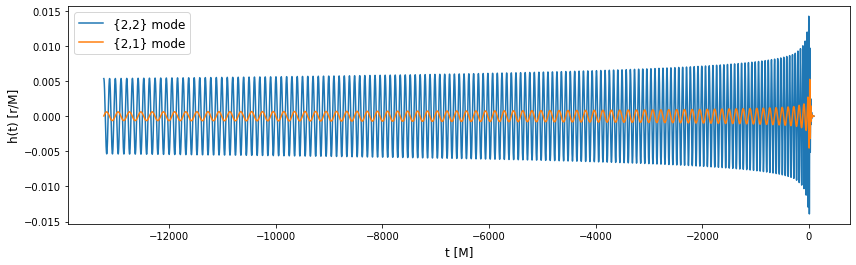

In [5]:
h_22 = hsur[(2,2)]
h_21 = hsur[(2,1)]

plt.figure(figsize=(14,4))
plt.plot(tsur, np.real(h_22), label='{2,2} mode')
plt.plot(tsur, np.real(h_21), label='{2,1} mode')
plt.xlabel('t [M]', fontsize=12)
plt.ylabel('h(t) [r/M]', fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
plt.show()

### 1.2 Obtaining raw waveform (not calibrated to NR) from the surrogate in geometric unit

In [6]:
q = 100.0 # mass ratio

t1 = time.time()
tsur_raw, hsur_raw = emriSur.generate_surrogate(q, calibrated=False) #h_out is a dictionary with modes as key; defaults to all available modes
t2 = time.time()
print('It takes %.6f s to generate wf with all modes'%(t2-t1))

It takes 0.137618 s to generate wf with all modes


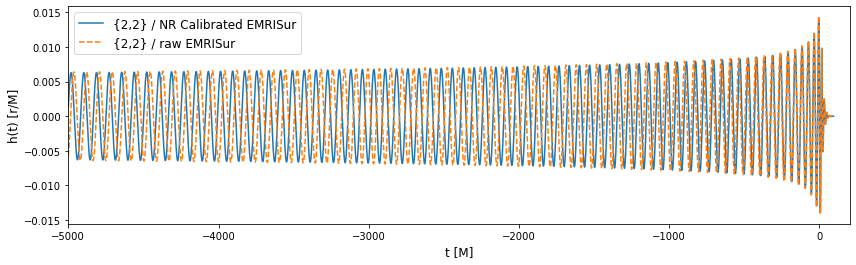

In [7]:
h_22_raw = hsur_raw[(2,2)]

plt.figure(figsize=(14,4))
plt.plot(tsur, np.real(h_22), label='{2,2} / NR Calibrated EMRISur')
plt.plot(tsur_raw, np.real(h_22_raw), label='{2,2} / raw EMRISur', ls='--')
plt.xlabel('t [M]', fontsize=12)
plt.ylabel('h(t) [r/M]', fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
plt.xlim([-5000,200])
plt.show()

# 2. Evaluation example : Physical Waveforms

Scales the waveform obtained in geometrc unit to physical units

The example below is shown for 22 mode only.

Input: total mass M (in Solar Mass unit), luminosity distance dL (Mpc)

In [8]:
q = 100.0 # mass ratio
M_tot=80.0 #total mass in solar unit
dist_mpc=500.0 # distance of the binary in Mpc

t1 = time.time()
# one needs to provide both M_tot and dist_mpc to obtain physical waveforms
# using only one argument will lead to ValueError
tsur_phy, hsur_phy = emriSur.generate_surrogate(q, M_tot=M_tot, dist_mpc=dist_mpc) #h_out is a dictionary with modes as key; defaults to all available modes
t2 = time.time()
print('It takes %.6f s to generate wf with all modes'%(t2-t1))

It takes 0.159037 s to generate wf with all modes


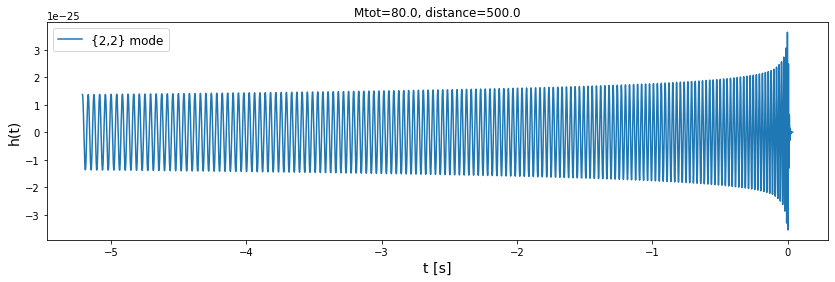

In [9]:
h_22 = hsur_phy[(2,2)]

plt.figure(figsize=(14,4))
plt.title('Mtot=%.1f, distance=%.1f'%(M_tot,dist_mpc))
plt.plot(tsur_phy, np.real(h_22),label='{2,2} mode')
plt.xlabel('t [s]', fontsize=14)
plt.ylabel('h(t)', fontsize=14)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f_physical.png'%q)
plt.show()

# 3. Test: EMRI Surrogate vs NR

Here we repeat the experiment shown in Figure 3 (https://arxiv.org/pdf/1910.10473.pdf) which compares the EMRI surrogate model to Numerical Relativity waveforms in the range q <=10. 

Our numerical relativity waveforms will be generated using another (different) surrogate model provided in the GWSurrogate package. 

To install gwsurrogate do:

```bash
>>> pip install gwsurrogate
```

To get the numerical relativity surrogate model, open up ipython and do

```python
>>> import gwsurrogate as gws
>>> gws.catalog.pull("SpEC_q1_10_NoSpin")
```

In [10]:
import gwsurrogate as gws
gws.catalog.pull("SpEC_q1_10_NoSpin")

# gwtools is installed as a dependency of gwsurrogate
from gwtools.gwtools import modes_list_to_dict, minimize_norm_error, euclidean_norm_sqrd, q_to_nu
from gwtools.gwtools import minimize_norm_error_multi_mode
from gwtools.mismatch import mathcal_E_error_from_mode_list, mathcal_E_error_from_mode_dict

emri_modes = [(2,2),(2,1),(3,3),(3,1),(3,2),(4,4),(4,2),(4,3),(5,5),(5,3),(5,4)]

path_to_surrogate = gws.__path__[0]+'/surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
spec = gws.EvaluateSurrogate(path_to_surrogate, ell_m=emri_modes)

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work

SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5 file exits, moving to /opt/jupyter-hub/anaconda3/lib/python3.8/site-packages/gwsurrogate/surrogate_downloads/backup/2022Feb02_17h:07m:57s_SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5.
loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l2_m1

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m3

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m1

>>> Found surrogate ID from file name: SpEC

In [11]:
# generate a q=8 EMRI and NR waveform
q= 8
time_emri, h_emri = emriSur.generate_surrogate(q)

modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
h_spec = hp_spec + 1.0j*hc_spec
h_spec = modes_list_to_dict(modes_spec,h_spec)

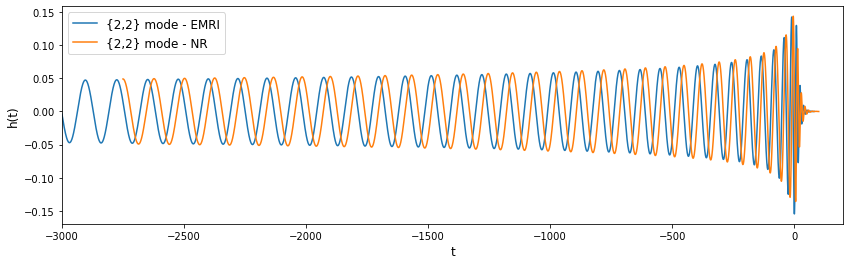

In [12]:
# waveforms have not yet been aligned in time and phase
plt.figure(figsize=(14,4))
plt.plot(time_emri,np.real(h_emri[(2,2)]),label='{2,2} mode - EMRI')
plt.plot(times_spec,np.real(h_spec[(2,2)]),label='{2,2} mode - NR')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
plt.xlim([-3000,200])
plt.show()

In [13]:
## here we minimize the error over time and phase shifts for the (2,2) mode only
[errors_before_min, errors_after_min], [tc, phic], [common_times,h_emri_aligned,h_nr_aligned] = \
minimize_norm_error(time_emri,h_emri[(2,2)],times_spec,h_spec[(2,2)],\
    euclidean_norm_sqrd,t_low_adj=5,t_up_adj=2,method='nelder-mead')
print('error before minimization : %.6f'%errors_before_min)
print('error after minimization : %.6f'%errors_after_min)
print('time shift needed : %.5f'%tc) # time shift needed
print('phase shift needed : %.5f'%phic) # phase shift needed

error before minimization : 0.252764
error after minimization : 0.022793
time shift needed : -0.73404
phase shift needed : -328.18172


(-0.15, 0.15)

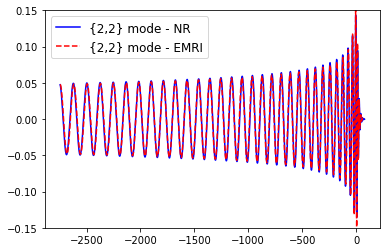

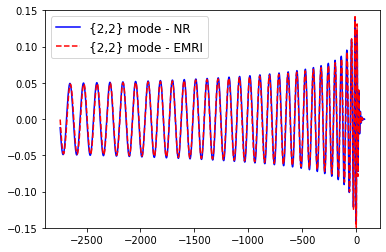

In [14]:
# plot waveforms after minimizations
plt.figure(1)
plt.plot(common_times, np.real(h_nr_aligned),'blue',label='{2,2} mode - NR')
plt.plot(common_times, np.real(h_emri_aligned),'r--',label='{2,2} mode - EMRI')
plt.legend(fontsize=12)
plt.ylim(-0.15,0.15)

plt.figure(2)
plt.plot(common_times, np.imag(h_nr_aligned),'blue',label='{2,2} mode - NR')
plt.plot(common_times, np.imag(h_emri_aligned),'r--',label='{2,2} mode - EMRI')
plt.legend(fontsize=12)
plt.ylim(-0.15,0.15)

### 3.1 Regeneration fig 3 of https://arxiv.org/abs/1910.10473

Here we repeat the previous comparision for mass ratios $3 \leq q \leq 10$ using the same L2-type norm for data plotted in figure 3.

### 3.1.1. (2,2) mode 

In [15]:
l2_error_22 = []
qs = [3,4,5,6,7,8,9,10]

for q in qs:
    modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
    h_spec = hp_spec + 1.0j*hc_spec
    h_spec = modes_list_to_dict(modes_spec,h_spec)

    time_emri, h_emri = emriSur.generate_surrogate(q, modes = [(2,2)])    
    
    [errors_before_min, errors_after_min], [tc, phic], [t1,h1_matched,h_ref] = \
    minimize_norm_error(time_emri,h_emri[(2,2)],times_spec,h_spec[(2,2)],\
        euclidean_norm_sqrd,t_low_adj=5,t_up_adj=2,method='nelder-mead')
    
    l2_error_22.append(mathcal_E_error_from_mode_list(h_ref, h1_matched))
    print("q = %i, error = %e"%(q,l2_error_22[-1]))

q = 3, error = 2.936462e-02
q = 4, error = 2.276101e-02
q = 5, error = 1.868428e-02
q = 6, error = 1.538660e-02
q = 7, error = 1.312339e-02
q = 8, error = 1.139640e-02
q = 9, error = 9.971492e-03
q = 10, error = 8.906435e-03


### 3.1.2. Multi-mode model

In [16]:
l2_error_multi_mode = []
qs = [3,4,5,6,7,8,9,10]
mode_to_match = (2,2)

for q in qs:
    modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
    h_spec = hp_spec + 1.0j*hc_spec
    h_spec = modes_list_to_dict(modes_spec,h_spec)

    time_emri, h_emri = emriSur.generate_surrogate(q)
    
    [rel_mode_errors, min_norm_sphere], [tc, z_rot_opt], [t1,h_emri_matched,h_spec_matched] = \
    minimize_norm_error_multi_mode(time_emri,h_emri,\
                                           times_spec,h_spec,\
                                           mode_list=None,ell_m_match=mode_to_match,\
                                           t_low_adj=5,t_up_adj=2,method='nelder-mead',verbose=False)
    
    l2_error_multi_mode.append(mathcal_E_error_from_mode_dict(h_emri_matched, h_spec_matched))
    print("q = %i, error = %e"%(q,l2_error_multi_mode[-1]))

Performing a physical rotation by pi...
q = 3, error = 4.107756e-02
Performing a physical rotation by pi...
q = 4, error = 3.114015e-02
Performing a physical rotation by pi...
q = 5, error = 2.494371e-02
Performing a physical rotation by pi...
q = 6, error = 1.995809e-02
Performing a physical rotation by pi...
q = 7, error = 1.667331e-02
Performing a physical rotation by pi...
q = 8, error = 1.429690e-02
Performing a physical rotation by pi...
q = 9, error = 1.239684e-02
Performing a physical rotation by pi...
q = 10, error = 1.104878e-02


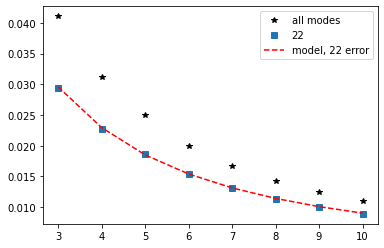

In [17]:
# Ref https://arxiv.org/abs/1910.10473 also models the difference between NR and the EMRI mode, 
# which we show agrees with the data just generated above
nus = q_to_nu(np.array(qs))
error_model_22 =  0.08211135*nus + 0.2698017*nus**2 + 0.7116969*nus**3

plt.figure(1)
plt.plot(qs, l2_error_multi_mode, 'k*',label='all modes')
plt.plot(qs, l2_error_22, 's',label='22')
plt.plot(qs, error_model_22,'r--',label='model, 22 error')
plt.legend()
plt.show()